In [15]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. BASIC PREPARATION AND MERGING

In [3]:
weather_prepared = pd.read_csv('weather_data_prepared.csv')

In [4]:
alarms_features_prepared = pd.read_csv('alarm_features_prepared.csv')

In [5]:
isw_prepared = pd.read_csv('isw_reports_prepared.csv')

In [6]:
weather_prepared

,region_id,date_value,time_value,dew,snow,temp,precip,tempmax,tempmin,winddir,...,visibility,precipcover,datetime,precipprob_binary,rain_bin,snow_bin,rain_snow_bin,sunrise_seconds,sunset_seconds,daylight_duration_seconds
0,23,2022-02-24,00:00:00,-2.9,0.0,0.9,0.0,4.9,-0.1,132.0,...,24.100000,0.00,2022-02-24 00:00:00,0,0,0,0,24281,62765,38484
1,23,2022-02-24,01:00:00,-2.8,0.0,0.6,0.0,4.9,-0.1,147.9,...,24.100000,0.00,2022-02-24 01:00:00,0,0,0,0,24281,62765,38484
2,23,2022-02-24,02:00:00,-2.3,0.0,0.4,0.0,4.9,-0.1,198.2,...,24.100000,0.00,2022-02-24 02:00:00,0,0,0,0,24281,62765,38484
3,23,2022-02-24,03:00:00,-2.3,0.0,0.2,0.0,4.9,-0.1,202.3,...,24.100000,0.00,2022-02-24 03:00:00,0,0,0,0,24281,62765,38484
4,23,2022-02-24,04:00:00,-2.4,0.0,0.0,0.0,4.9,-0.1,203.6,...,24.100000,0.00,2022-02-24 04:00:00,0,0,0,0,24281,62765,38484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634675,7,2025-03-01,19:00:00,1.2,0.0,1.3,0.0,2.5,0.1,189.6,...,1.333333,8.33,2025-03-01 19:00:00,0,0,0,0,24527,64046,39519
634676,7,2025-03-01,20:00:00,1.2,0.0,1.2,0.3,2.5,0.1,220.0,...,1.000000,8.33,2025-03-01 20:00:00,1,0,0,1,24527,64046,39519
634677,7,2025-03-01,21:00:00,1.3,0.0,1.7,0.0,2.5,0.1,198.0,...,0.666667,8.33,2025-03-01 21:00:00,0,0,0,0,24527,64046,39519
634678,7,2025-03-01,22:00:00,1.0,0.0,1.0,0.0,2.5,0.1,202.3,...,0.333333,8.33,2025-03-01 22:00:00,0,0,0,0,24527,64046,39519


In [7]:
alarms_features_prepared

,region_id,hour_start,alarm_minutes_in_hour,is_alarm_active,alarms_started_in_hour,time_since_last_alarm_end_minutes
0,10,2022-02-24 00:00:00,0.000000,0,0,512149.350000
1,10,2022-02-24 01:00:00,0.000000,0,0,512149.350000
2,10,2022-02-24 02:00:00,0.000000,0,0,512149.350000
3,10,2022-02-24 03:00:00,0.000000,0,0,512149.350000
4,10,2022-02-24 04:00:00,0.000000,0,0,512149.350000
...,...,...,...,...,...,...
634747,25,2025-03-01 19:00:00,0.000000,0,0,959.733333
634748,25,2025-03-01 20:00:00,0.000000,0,0,1019.733333
634749,25,2025-03-01 21:00:00,50.816667,1,1,1079.733333
634750,25,2025-03-01 22:00:00,60.000000,1,0,1139.733333


In [8]:
isw_prepared

,date,svd_comp_1,svd_comp_2,svd_comp_3,svd_comp_4,svd_comp_5,svd_comp_6,svd_comp_7,svd_comp_8,svd_comp_9,...,svd_comp_141,svd_comp_142,svd_comp_143,svd_comp_144,svd_comp_145,svd_comp_146,svd_comp_147,svd_comp_148,svd_comp_149,svd_comp_150
0,2022-02-24,0.231406,0.113453,0.127448,0.105655,0.128726,0.172093,-0.113485,-0.079844,-0.158733,...,-0.036413,0.026344,-0.005851,-0.027000,-0.005885,0.027045,-0.031285,0.051623,0.007152,0.016031
1,2022-02-25,0.236842,0.122241,0.135436,0.100210,0.141044,0.175319,-0.151957,-0.089340,-0.171017,...,0.000529,0.016313,-0.012013,-0.018154,-0.026495,0.022813,-0.045699,0.039631,-0.003964,0.005916
2,2022-02-26,0.252856,0.157072,0.168624,0.109284,0.152090,0.220771,-0.161296,-0.093684,-0.186725,...,0.004067,-0.025538,0.013086,-0.042489,0.011772,-0.003432,-0.018679,-0.020046,-0.003864,-0.006122
3,2022-02-27,0.250906,0.152892,0.178549,0.118152,0.157456,0.206573,-0.144489,-0.102788,-0.180502,...,0.029428,-0.009811,0.027759,-0.030727,-0.007179,-0.026978,0.012720,-0.041540,0.013072,-0.005067
4,2022-02-28,0.248396,0.147887,0.166173,0.111112,0.131580,0.198621,-0.111919,-0.079716,-0.175104,...,-0.007494,-0.051478,0.045730,0.009817,0.012191,-0.053523,0.011049,-0.015222,-0.034729,-0.014278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2025-02-25,0.434699,-0.290698,0.137020,-0.134252,0.054225,-0.001801,-0.071009,0.194973,-0.013816,...,-0.007506,-0.024911,-0.029233,0.013226,0.013393,-0.026268,-0.004354,0.026317,0.012937,-0.016769
1088,2025-02-26,0.406357,-0.273944,0.157600,-0.161494,0.059594,0.004037,-0.081583,0.239852,-0.024772,...,-0.002012,-0.003368,-0.039393,0.005027,-0.001091,0.017131,0.040327,0.031117,-0.000931,-0.014690
1089,2025-02-27,0.407333,-0.311196,0.182906,-0.172292,0.098146,-0.002363,-0.102321,0.238852,-0.010877,...,0.030724,0.018139,-0.024595,-0.011180,0.005215,0.003520,0.021557,-0.008575,-0.032183,-0.014421
1090,2025-02-28,0.434414,-0.296324,0.159768,-0.159307,0.075228,-0.005174,-0.057242,0.169707,-0.010135,...,-0.001739,0.016067,-0.045708,0.016310,0.002560,-0.026677,-0.005022,-0.008501,-0.042639,-0.025572


In [9]:
alarms_features_prepared['hour_start'] = pd.to_datetime(alarms_features_prepared['hour_start'], errors='coerce')
weather_prepared['datetime'] = pd.to_datetime(weather_prepared['datetime'], errors='coerce')
isw_prepared['date'] = pd.to_datetime(isw_prepared['date'], errors='coerce').dt.normalize()

In [10]:
alarms_features_prepared.isna().sum()

region_id                            0
hour_start                           0
alarm_minutes_in_hour                0
is_alarm_active                      0
alarms_started_in_hour               0
time_since_last_alarm_end_minutes    0
dtype: int64

In [11]:
weather_prepared.isna().sum()

region_id                    0
date_value                   0
time_value                   0
dew                          0
snow                         0
temp                         0
precip                       0
tempmax                      0
tempmin                      0
winddir                      0
humidity                     0
pressure                     0
windgust                     0
moonphase                    0
snowdepth                    0
windspeed                    0
cloudcover                   0
visibility                   0
precipcover                  0
datetime                     0
precipprob_binary            0
rain_bin                     0
snow_bin                     0
rain_snow_bin                0
sunrise_seconds              0
sunset_seconds               0
daylight_duration_seconds    0
dtype: int64

In [12]:
isw_prepared.isna().sum()

date            0
svd_comp_1      0
svd_comp_2      0
svd_comp_3      0
svd_comp_4      0
               ..
svd_comp_146    0
svd_comp_147    0
svd_comp_148    0
svd_comp_149    0
svd_comp_150    0
Length: 151, dtype: int64

In [13]:
merged_v1 = pd.merge(
    alarms_features_prepared,
    weather_prepared,
    left_on=['region_id', 'hour_start'],
    right_on=['region_id', 'datetime'],
    how='left'
)

merged_v1 = merged_v1.drop(columns=['datetime'])

In [56]:
merged_v1.isna().sum()

region_id                             0
hour_start                            0
alarm_minutes_in_hour                 0
is_alarm_active                       0
alarms_started_in_hour                0
time_since_last_alarm_end_minutes     0
date_value                           72
time_value                           72
dew                                  72
snow                                 72
temp                                 72
precip                               72
tempmax                              72
tempmin                              72
winddir                              72
humidity                             72
pressure                             72
windgust                             72
moonphase                            72
snowdepth                            72
windspeed                            72
cloudcover                           72
visibility                           72
precipcover                          72
precipprob_binary                    72


In [57]:
alarm_keys = set(zip(alarms_features_prepared['region_id'], alarms_features_prepared['hour_start']))
weather_keys = set(zip(weather_prepared['region_id'], weather_prepared['datetime']))

missing_keys = alarm_keys - weather_keys

In [58]:
# missing on the dates around the end of March each year (daylight saving time)
# this is not a data loss during the transformation - in the original dataset with
# historical data for all days of daylight saving time, the weather values for 03:00:00 are missing

missing_keys

{(1, Timestamp('2022-03-27 03:00:00')),
 (1, Timestamp('2023-03-26 03:00:00')),
 (1, Timestamp('2024-03-31 03:00:00')),
 (2, Timestamp('2022-03-27 03:00:00')),
 (2, Timestamp('2023-03-26 03:00:00')),
 (2, Timestamp('2024-03-31 03:00:00')),
 (3, Timestamp('2022-03-27 03:00:00')),
 (3, Timestamp('2023-03-26 03:00:00')),
 (3, Timestamp('2024-03-31 03:00:00')),
 (4, Timestamp('2022-03-27 03:00:00')),
 (4, Timestamp('2023-03-26 03:00:00')),
 (4, Timestamp('2024-03-31 03:00:00')),
 (5, Timestamp('2022-03-27 03:00:00')),
 (5, Timestamp('2023-03-26 03:00:00')),
 (5, Timestamp('2024-03-31 03:00:00')),
 (6, Timestamp('2022-03-27 03:00:00')),
 (6, Timestamp('2023-03-26 03:00:00')),
 (6, Timestamp('2024-03-31 03:00:00')),
 (7, Timestamp('2022-03-27 03:00:00')),
 (7, Timestamp('2023-03-26 03:00:00')),
 (7, Timestamp('2024-03-31 03:00:00')),
 (8, Timestamp('2022-03-27 03:00:00')),
 (8, Timestamp('2023-03-26 03:00:00')),
 (8, Timestamp('2024-03-31 03:00:00')),
 (9, Timestamp('2022-03-27 03:00:00')),


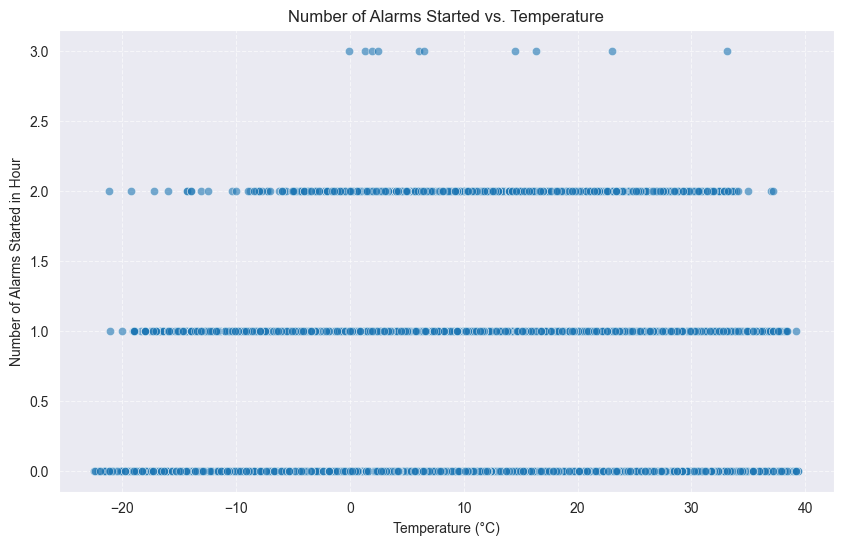

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_v1, x='temp', y='alarms_started_in_hour', alpha=0.6)
plt.title('Number of Alarms Started vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Alarms Started in Hour')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

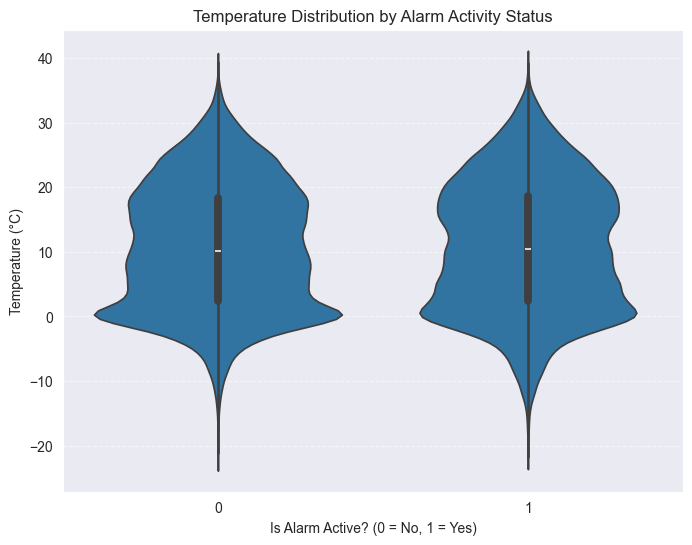

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=merged_v1, x=merged_v1['is_alarm_active'].astype(str), y='temp')
plt.title('Temperature Distribution by Alarm Activity Status')
plt.xlabel('Is Alarm Active? (0 = No, 1 = Yes)')
plt.ylabel('Temperature (°C)')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

                                   alarm_minutes_in_hour  \
alarm_minutes_in_hour                           1.000000   
alarms_started_in_hour                          0.383265   
time_since_last_alarm_end_minutes              -0.034063   
temp                                           -0.024909   
precip                                         -0.002800   
tempmax                                        -0.005291   
tempmin                                        -0.016580   
humidity                                       -0.022176   
windgust                                       -0.010208   
windspeed                                       0.005666   

                                   alarms_started_in_hour  \
alarm_minutes_in_hour                            0.383265   
alarms_started_in_hour                           1.000000   
time_since_last_alarm_end_minutes               -0.027416   
temp                                             0.034259   
precip                            

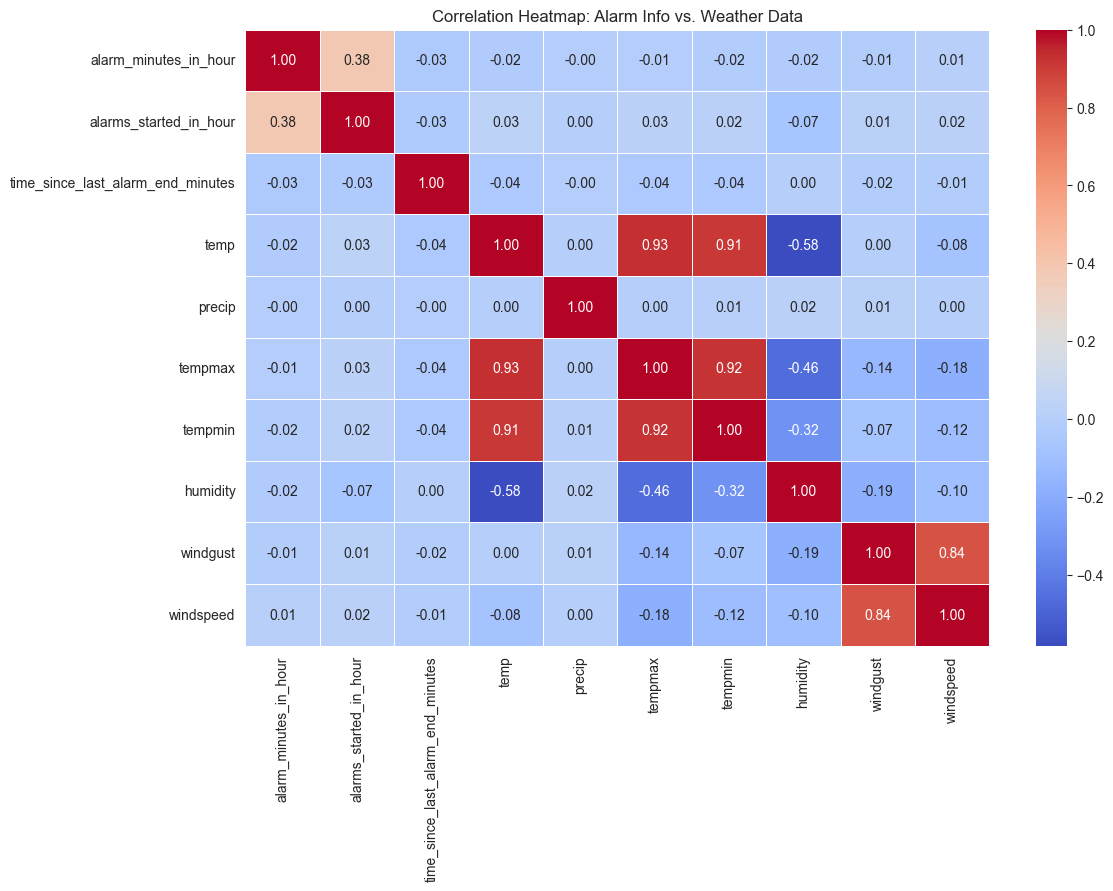

In [22]:
columns_of_interest = [
    'alarm_minutes_in_hour', 'alarms_started_in_hour', 'time_since_last_alarm_end_minutes',
    'temp', 'precip', 'tempmax', 'tempmin', 'humidity', 'windgust', 'windspeed'
]

corr_matrix = merged_v1[columns_of_interest].corr()
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap: Alarm Info vs. Weather Data')
plt.show()

In [59]:
merged_v1['date_for_merge'] = merged_v1['hour_start'].dt.normalize()
merged_v1[['region_id', 'hour_start', 'date_for_merge']]

,region_id,hour_start,date_for_merge
0,10,2022-02-24 00:00:00,2022-02-24
1,10,2022-02-24 01:00:00,2022-02-24
2,10,2022-02-24 02:00:00,2022-02-24
3,10,2022-02-24 03:00:00,2022-02-24
4,10,2022-02-24 04:00:00,2022-02-24
...,...,...,...
634747,25,2025-03-01 19:00:00,2025-03-01
634748,25,2025-03-01 20:00:00,2025-03-01
634749,25,2025-03-01 21:00:00,2025-03-01
634750,25,2025-03-01 22:00:00,2025-03-01


In [60]:
print(isw_prepared.memory_usage(deep=True).sum() / 1000)

tfidf_columns = isw_prepared.columns.difference(['date'])
for col in tfidf_columns:
    if pd.api.types.is_float_dtype(isw_prepared[col]):
         isw_prepared[col] = isw_prepared[col].astype('float32')

print(isw_prepared.memory_usage(deep=True).sum() / 1000)

1319.268
664.068


In [61]:
final_df = pd.merge(
    merged_v1,
    isw_prepared,
    left_on='date_for_merge',
    right_on='date',
    how='left'
)

final_df = final_df.drop(columns=['date_for_merge', 'date'])

In [62]:
final_df = final_df.sort_values(by=['hour_start', 'region_id']).reset_index(drop=True)

In [63]:
# we see gaps in weather (described above) and gaps in isw data (described in isw_vectorization.ipynb)
# we'll work through these gaps in the next step

final_df.isna().sum()

region_id                    0
hour_start                   0
alarm_minutes_in_hour        0
is_alarm_active              0
alarms_started_in_hour       0
                          ... 
svd_comp_146              5760
svd_comp_147              5760
svd_comp_148              5760
svd_comp_149              5760
svd_comp_150              5760
Length: 181, dtype: int64

In [64]:
# weather nans
weather_cols = weather_prepared.columns.difference(['region_id', 'datetime']).tolist()
final_df[weather_cols] = final_df.groupby('region_id')[weather_cols].ffill()

# svd nans
svd_cols = [col for col in isw_prepared.columns if col.startswith('svd_comp_')]
final_df[svd_cols] = final_df[svd_cols].ffill()

# final check
final_df.isna().sum()

region_id                 0
hour_start                0
alarm_minutes_in_hour     0
is_alarm_active           0
alarms_started_in_hour    0
                         ..
svd_comp_146              0
svd_comp_147              0
svd_comp_148              0
svd_comp_149              0
svd_comp_150              0
Length: 181, dtype: int64

In [65]:
final_df

,region_id,hour_start,alarm_minutes_in_hour,is_alarm_active,alarms_started_in_hour,time_since_last_alarm_end_minutes,date_value,time_value,dew,snow,...,svd_comp_141,svd_comp_142,svd_comp_143,svd_comp_144,svd_comp_145,svd_comp_146,svd_comp_147,svd_comp_148,svd_comp_149,svd_comp_150
0,1,2022-02-24 00:00:00,0.000000,0,0,512149.350000,2022-02-24,00:00:00,0.9,0.0,...,-0.036413,0.026344,-0.005851,-0.027000,-0.005885,0.027045,-0.031285,0.051623,0.007152,0.016031
1,2,2022-02-24 00:00:00,0.000000,0,0,512149.350000,2022-02-24,00:00:00,0.9,0.0,...,-0.036413,0.026344,-0.005851,-0.027000,-0.005885,0.027045,-0.031285,0.051623,0.007152,0.016031
2,3,2022-02-24 00:00:00,0.000000,0,0,512149.350000,2022-02-24,00:00:00,0.9,0.0,...,-0.036413,0.026344,-0.005851,-0.027000,-0.005885,0.027045,-0.031285,0.051623,0.007152,0.016031
3,4,2022-02-24 00:00:00,0.000000,0,0,512149.350000,2022-02-24,00:00:00,0.8,0.1,...,-0.036413,0.026344,-0.005851,-0.027000,-0.005885,0.027045,-0.031285,0.051623,0.007152,0.016031
4,5,2022-02-24 00:00:00,0.000000,0,0,512149.350000,2022-02-24,00:00:00,-1.0,0.0,...,-0.036413,0.026344,-0.005851,-0.027000,-0.005885,0.027045,-0.031285,0.051623,0.007152,0.016031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634747,21,2025-03-01 23:00:00,44.083333,1,0,290.616667,2025-03-01,23:00:00,-5.8,0.0,...,0.002782,0.032773,0.009381,0.009542,0.011265,-0.012766,0.002189,0.026272,-0.007613,-0.013704
634748,22,2025-03-01 23:00:00,0.000000,0,0,3982.533333,2025-03-01,23:00:00,0.2,0.0,...,0.002782,0.032773,0.009381,0.009542,0.011265,-0.012766,0.002189,0.026272,-0.007613,-0.013704
634749,23,2025-03-01 23:00:00,0.000000,0,0,292.783333,2025-03-01,23:00:00,-3.2,0.0,...,0.002782,0.032773,0.009381,0.009542,0.011265,-0.012766,0.002189,0.026272,-0.007613,-0.013704
634750,24,2025-03-01 23:00:00,0.000000,0,0,6692.016667,2025-03-01,23:00:00,2.1,0.0,...,0.002782,0.032773,0.009381,0.009542,0.011265,-0.012766,0.002189,0.026272,-0.007613,-0.013704


In [66]:
final_df['hour_start'] = pd.to_datetime(final_df['hour_start'], errors='coerce')
final_df['hour_of_day'] = final_df['hour_start'].dt.hour
final_df['day_of_week'] = final_df['hour_start'].dt.dayofweek
final_df['month'] = final_df['hour_start'].dt.month

C:\Users\windo\AppData\Local\Temp\ipykernel_2280\3733971194.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['hour_of_day'] = final_df['hour_start'].dt.hour
C:\Users\windo\AppData\Local\Temp\ipykernel_2280\3733971194.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df['day_of_week'] = final_df['hour_start'].dt.dayofweek
C:\Users\windo\AppData\Local\Temp\ipykernel_2280\3733971194.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [67]:
final_df = final_df.copy()

In [68]:
final_df.to_csv('final_df_merged.csv', index=False)